In [810]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [811]:
df = pd.read_csv('customer_churn_data.csv')

In [812]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


## Summary of the dataset
This dataset provides a comprehensive view of customer behavior and churn in the telecom industry. It includes detailed information on customer demographics, service usage, and various indicators that are critical for analyzing customer retention and churn.

Key Features:

* CustomerID: Unique identifier for each customer.
* Age: Age of the customer, reflecting their demographic profile.
* Gender: Gender of the customer (Male or Female).
* Tenure: Duration (in months) the customer has been with the service provider.
* MonthlyCharges: The monthly fee charged to the customer.
* ContractType: Type of contract the customer is on (Month-to-Month, One-Year, Two-Year).
* InternetService: Type of internet service subscribed to (DSL, Fiber Optic, None).
* TechSupport: Whether the customer has tech support (Yes or No).
* TotalCharges: Total amount charged to the customer (calculated as MonthlyCharges * Tenure).
* Churn: Target variable indicating whether the customer has churned (Yes or No).

In [814]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [815]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [816]:
df.sample(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
468,469,39,Male,2,74.35,One-Year,NaN,148.70,No,Yes
923,924,37,Male,26,52.71,Month-to-Month,DSL,1370.46,No,Yes
24,25,39,Male,47,79.36,One-Year,DSL,3729.92,Yes,No
641,642,61,Female,17,44.42,One-Year,DSL,755.14,No,Yes
320,321,45,Female,8,80.11,Two-Year,NaN,640.88,No,Yes
415,416,37,Male,14,94.44,Month-to-Month,NaN,1322.16,No,Yes
449,450,34,Female,30,49.12,Month-to-Month,Fiber Optic,1473.60,No,Yes
385,386,46,Female,36,41.29,Month-to-Month,Fiber Optic,1486.44,Yes,Yes
680,681,52,Male,36,63.72,Month-to-Month,DSL,2293.92,No,Yes
368,369,45,Female,18,79.60,Two-Year,Fiber Optic,1432.80,No,Yes


In [817]:
percentage = (df['InternetService'].isnull().sum() / df.shape[0])*100
print(f"The InternetService has {percentage} % missing values.")

The InternetService has 29.7 % missing values.


In [818]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [819]:
df.duplicated().sum()


0

In [820]:
df['InternetService'].mode()[0]

'Fiber Optic'

In [821]:
df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_36124\1678927778.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)


In [822]:
df.isnull().sum()



CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

# EDA

In [824]:

df['CustomerID'] = df['CustomerID'].astype(str)

# Convert object columns to category type
categorical_cols = ['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verify changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerID       1000 non-null   object  
 1   Age              1000 non-null   int64   
 2   Gender           1000 non-null   category
 3   Tenure           1000 non-null   int64   
 4   MonthlyCharges   1000 non-null   float64 
 5   ContractType     1000 non-null   category
 6   InternetService  1000 non-null   category
 7   TotalCharges     1000 non-null   float64 
 8   TechSupport      1000 non-null   category
 9   Churn            1000 non-null   category
dtypes: category(5), float64(2), int64(2), object(1)
memory usage: 44.7+ KB


- changing the customerID data type as str to Prevents algorithms from treating IDs as numeric features
- changing other categorical data type as category

In [826]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes


In [827]:
df['Age'].describe()

count    1000.000000
mean       44.674000
std         9.797741
min        12.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        83.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

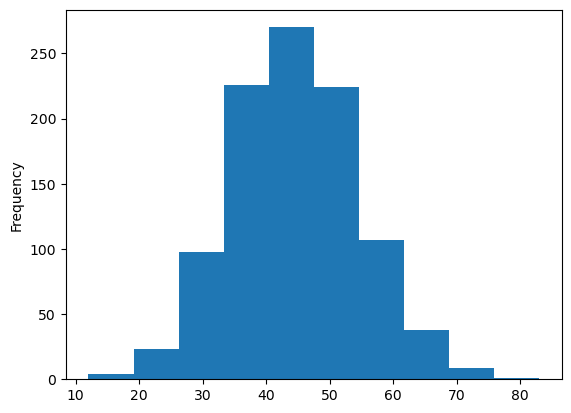

In [828]:
df['Age'].plot(kind = 'hist')

<Axes: ylabel='Density'>

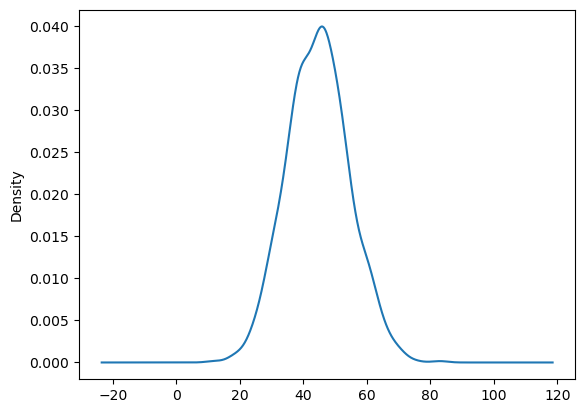

In [829]:
df['Age'].plot(kind = 'kde')


In [830]:
df['Age'].skew()

0.11059849403246863

<Axes: >

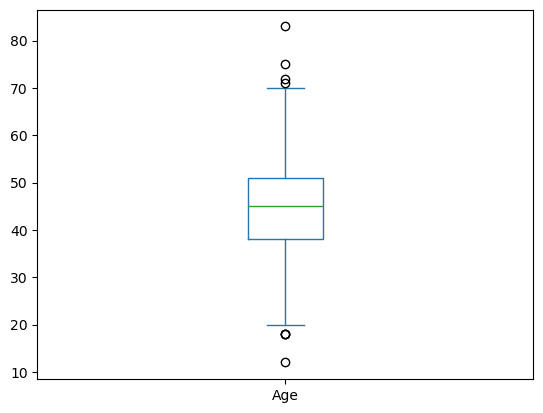

In [831]:
df['Age'].plot(kind = 'box')

In [832]:
df[df['Age'] <18]

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
262,263,12,Female,1,37.4,Two-Year,DSL,37.4,No,Yes


In [833]:
df[df['Age'] >70]


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
179,180,72,Female,40,102.25,Month-to-Month,Fiber Optic,4090.00,No,Yes
209,210,83,Male,2,86.04,Month-to-Month,DSL,172.08,No,Yes
478,479,75,Female,15,89.28,Month-to-Month,DSL,1339.20,Yes,Yes
755,756,71,Female,13,92.02,Two-Year,Fiber Optic,1196.26,No,Yes


<Axes: xlabel='Tenure', ylabel='TotalCharges'>

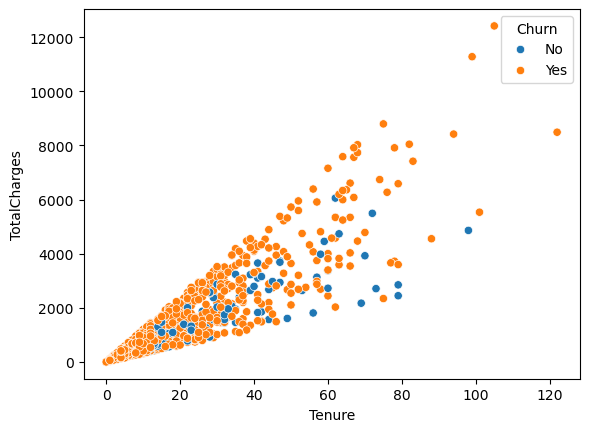

In [834]:
sns.scatterplot(data = df, x= 'Tenure', y='TotalCharges', hue='Churn')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

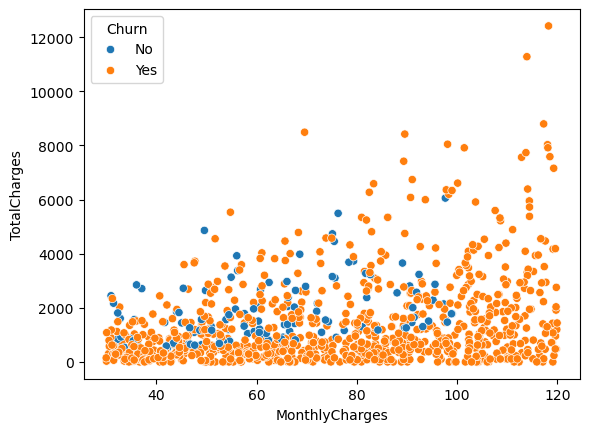

In [835]:
sns.scatterplot(data = df, x= 'MonthlyCharges', y='TotalCharges', hue='Churn')


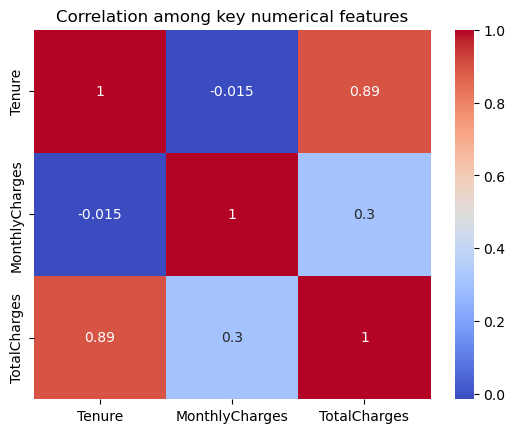

In [836]:
sns.heatmap(df[['Tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation among key numerical features')
plt.show()


TotalCharges is calculated as  - TotalCharges ≈ MonthlyCharges × Tenure so it’s mathematically dependent on both MonthlyCharges and Tenure. To remove the multicollinearity problem we have to drop TotalCharges.


In [838]:
df['MonthlyCharges'].describe()

count    1000.000000
mean       74.391290
std        25.712083
min        30.000000
25%        52.357500
50%        74.060000
75%        96.102500
max       119.960000
Name: MonthlyCharges, dtype: float64

<Axes: ylabel='Density'>

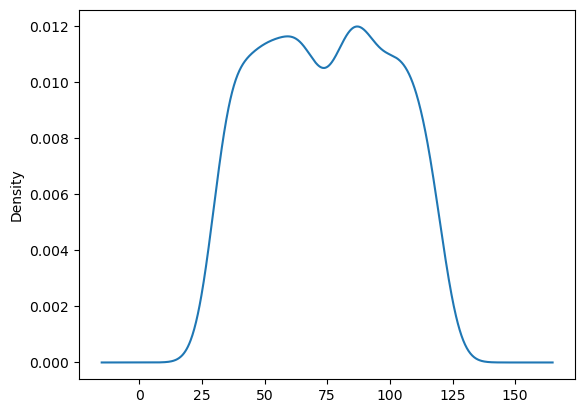

In [839]:
df['MonthlyCharges'].plot(kind ='kde')


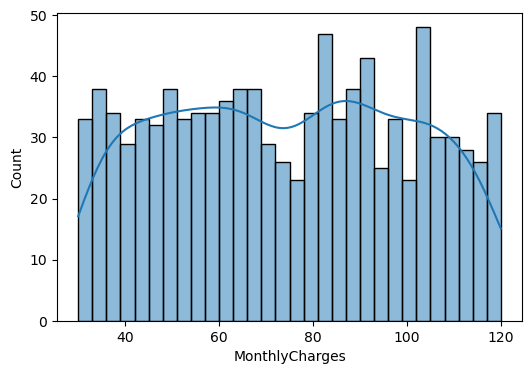

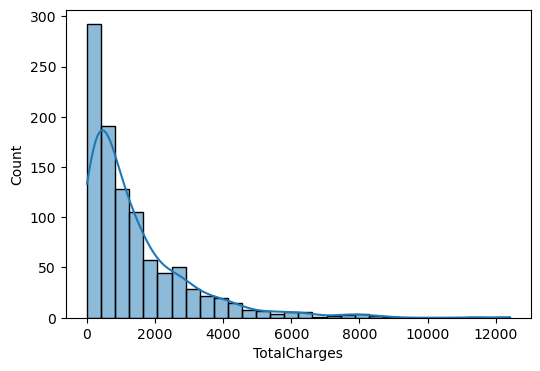

In [840]:
charges = ['MonthlyCharges', 'TotalCharges']

for col in charges:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde = True, bins =30)

<Axes: ylabel='MonthlyCharges'>

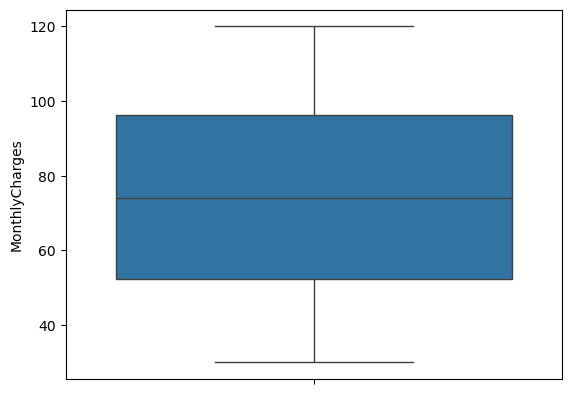

In [841]:
sns.boxplot(df['MonthlyCharges'])

<Axes: ylabel='TotalCharges'>

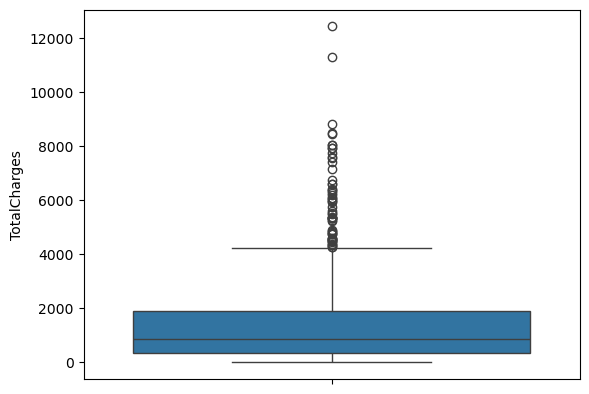

In [842]:
sns.boxplot(df['TotalCharges'])


In [843]:
df['TotalCharges'].describe()

count     1000.000000
mean      1404.364060
std       1571.755048
min          0.000000
25%        345.217500
50%        872.870000
75%       1900.175000
max      12416.250000
Name: TotalCharges, dtype: float64

<Axes: xlabel='Tenure', ylabel='Count'>

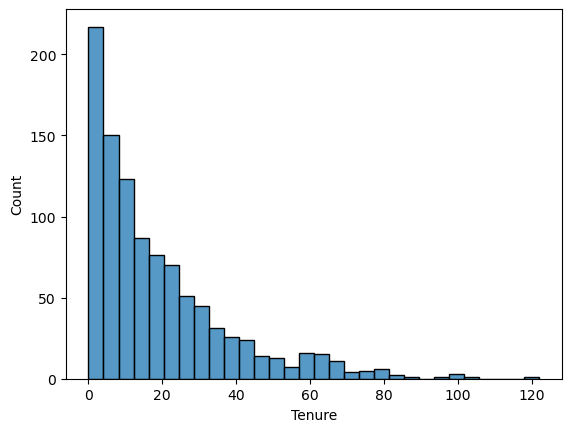

In [844]:
sns.histplot(df['Tenure'], bins= 30)

In [845]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes


In [846]:
df['Churn'].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

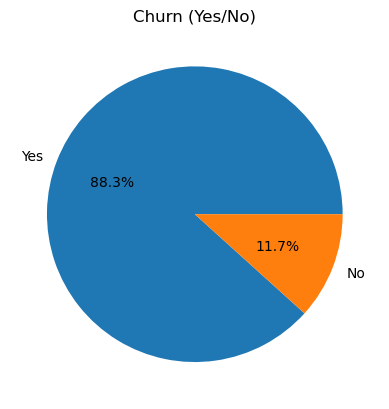

In [847]:
df['Churn'].value_counts().plot(kind = 'pie', autopct ='%0.1f%%')
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

### The dataset is highly imbalanced — only ~12% of customers stayed, while ~88% churned.

In [849]:
df['TechSupport'].value_counts()

TechSupport
Yes    506
No     494
Name: count, dtype: int64

<Axes: xlabel='Gender'>

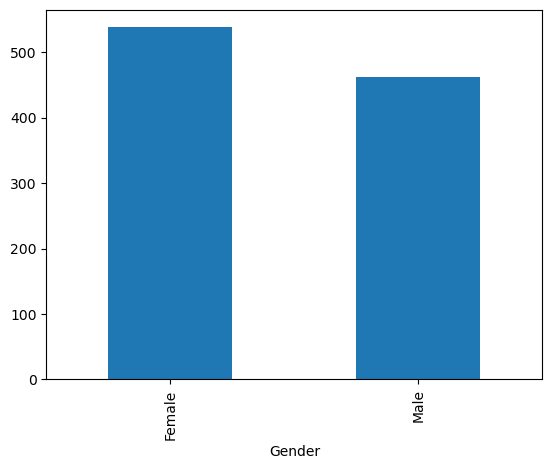

In [850]:
df['Gender'].value_counts().plot(kind='bar')

In [851]:
df.groupby("Churn", observed=True)['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [852]:
df.groupby(["Churn", "Gender"],observed=True)['MonthlyCharges'].mean()


Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [853]:
df.groupby("Churn", observed=True)['Tenure'].mean()


Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [854]:
pd.crosstab(df['Churn'], df['InternetService'])


InternetService,DSL,Fiber Optic
Churn,,
No,48,69
Yes,260,623


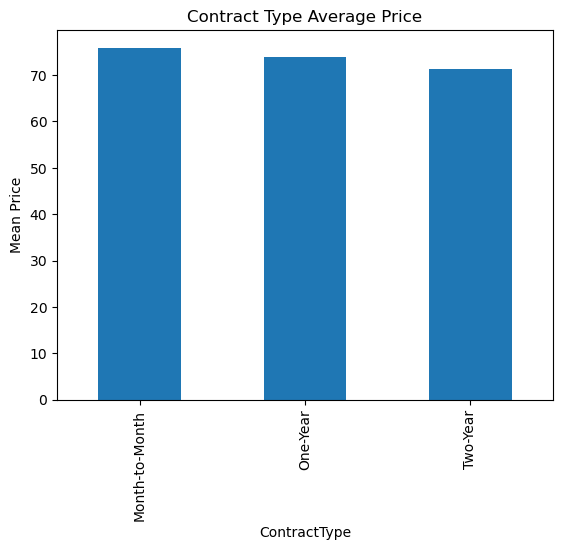

In [855]:
df.groupby("ContractType", observed=True)['MonthlyCharges'].mean().plot(kind = 'bar')
plt.xlabel('ContractType')
plt.ylabel("Mean Price")
plt.title('Contract Type Average Price')
plt.show()

In [856]:
pd.crosstab(df['Churn'], df['ContractType'])

ContractType,Month-to-Month,One-Year,Two-Year
Churn,,,
No,0,71,46
Yes,511,218,154


In [857]:
pd.crosstab(df['Churn'], df['ContractType'],normalize='columns')*100

ContractType,Month-to-Month,One-Year,Two-Year
Churn,,,
No,0.0,24.567474,23.0
Yes,100.0,75.432526,77.0


<Axes: xlabel='ContractType', ylabel='Churn'>

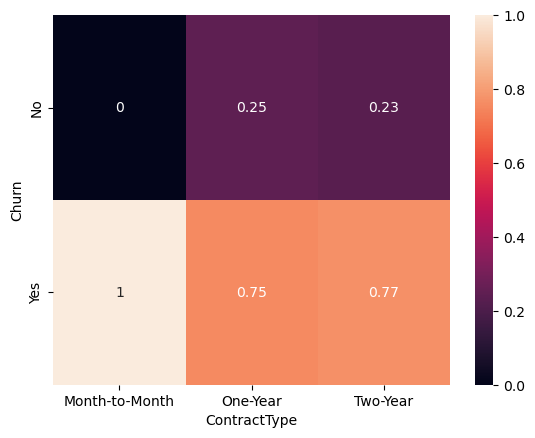

In [858]:

sns.heatmap(pd.crosstab(df['Churn'], df['ContractType'],normalize='columns'), annot=True)

In [859]:
df.drop(columns=['TotalCharges','CustomerID'], inplace=True)

In [860]:
df.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TechSupport,Churn
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,Yes,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,Yes,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,No,Yes
3,60,Female,8,102.34,One-Year,DSL,Yes,Yes
4,42,Male,32,69.01,Month-to-Month,Fiber Optic,No,Yes


### Encode Categorical Variables

In [862]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder


le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_churn = LabelEncoder()
df['Churn'] = le_churn.fit_transform(df['Churn'])


In [863]:
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)
encoded = ohe.fit_transform(df[['ContractType', 'InternetService', 'TechSupport']])
encoded_df = pd.DataFrame(encoded,columns=ohe.get_feature_names_out())

df = pd.concat([df.drop(['ContractType', 'InternetService', 'TechSupport'],axis = 1), encoded_df],axis=1)

In [864]:
df

,Age,Gender,Tenure,MonthlyCharges,Churn,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic,TechSupport_Yes
0,49,1,4,88.35,1,0,0,1,1
1,43,1,0,36.67,1,0,0,1,1
2,51,0,2,63.79,1,0,0,1,0
3,60,0,8,102.34,1,1,0,0,1
4,42,1,32,69.01,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
995,42,1,41,37.14,1,0,0,1,1
996,62,1,9,80.93,1,0,0,1,0
997,51,0,15,111.72,1,0,0,1,1
998,39,1,68,65.67,1,1,0,1,0


### Split Train/Test Sets

In [866]:
from sklearn.model_selection import train_test_split

X= df.drop('Churn',axis= 1)
y = df['Churn']

In [867]:
X

,Age,Gender,Tenure,MonthlyCharges,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic,TechSupport_Yes
0,49,1,4,88.35,0,0,1,1
1,43,1,0,36.67,0,0,1,1
2,51,0,2,63.79,0,0,1,0
3,60,0,8,102.34,1,0,0,1
4,42,1,32,69.01,0,0,1,0
...,...,...,...,...,...,...,...,...
995,42,1,41,37.14,0,0,1,1
996,62,1,9,80.93,0,0,1,0
997,51,0,15,111.72,0,0,1,1
998,39,1,68,65.67,1,0,1,0


In [868]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Scale Numerical Features

In [870]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Age','Tenure', 'MonthlyCharges']] = scaler.fit_transform(X_train[['Age','Tenure','MonthlyCharges']])
X_test[['Age', 'Tenure', 'MonthlyCharges']] = scaler.transform(X_test[['Age', 'Tenure', 'MonthlyCharges']])




In [871]:
X_train.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic,TechSupport_Yes
270,1.446805,0,-0.735372,0.270095,0,0,1,1
938,0.207350,0,-0.524323,-1.664451,1,0,1,1
329,0.620502,0,2.483117,-0.817384,1,0,1,0
886,0.517214,1,-0.629848,0.647217,0,0,0,0
769,1.859956,0,-0.682610,-1.377823,0,0,1,0


In [872]:
X_test.head(2)

,Age,Gender,Tenure,MonthlyCharges,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic,TechSupport_Yes
295,-0.722240,0,0.689205,-1.124208,0,0,1,1
638,-1.341967,0,0.267108,-0.663583,0,0,1,0


In [873]:
X_train.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'ContractType_One-Year',
       'ContractType_Two-Year', 'InternetService_Fiber Optic',
       'TechSupport_Yes'],
      dtype='object')

In [874]:
feature_col = ['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'ContractType_One-Year',
       'ContractType_Two-Year', 'InternetService_Fiber Optic',
       'TechSupport_Yes']


import pickle
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_col, f)

### Train the Logistic Regression Model

In [876]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train,y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


class_weight='balanced' -It automatically adjusts weights for each class based on their frequencies. 


In [878]:
y_pred = model.predict(X_test)

In [879]:
y_test

295    1
638    1
152    1
902    1
712    1
      ..
383    0
581    1
705    1
391    1
1      1
Name: Churn, Length: 200, dtype: int32

### Model evaluation

In [881]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


print('accuracy: ', accuracy_score(y_test,y_pred))
print('confusion matrix :\n ', confusion_matrix(y_test,y_pred))

accuracy:  0.915
confusion matrix :
  [[ 23   0]
 [ 17 160]]


In [882]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73        23
           1       1.00      0.90      0.95       177

    accuracy                           0.92       200
   macro avg       0.79      0.95      0.84       200
weighted avg       0.95      0.92      0.92       200



In [883]:
import pickle

with open('le_gender.pkl', 'wb') as f:
    pickle.dump(le_gender, f)

with open('le_churn.pkl', 'wb') as f:
    pickle.dump(le_churn, f)

# also save your model and scaler
with open('churn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('ohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)